https://www.kaggle.com/sudalairajkumar/indian-startup-funding/downloads/indian-startup-funding.zip/3



Possible questions which could be answered are:

    How does the funding ecosystem change with time?
    Do cities play a major role in funding?
    Which industries are favored by investors for funding?
    Who are the important investors in the Indian Ecosystem?
    How much funds does startups generally get in India?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("startup_funding.csv" , parse_dates=["Date ddmmyyyy"])

In [3]:
df.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",NaN


In [4]:
df.shape

(3009, 10)

In [5]:
df.isnull().sum()

Sr No                         0
Date ddmmyyyy                 0
Startup Name                  0
Industry Vertical           171
SubVertical                 936
City  Location              180
Investorsxe2x80x99 Name      23
InvestmentnType               3
Amount in USD               960
Remarks                    2590
dtype: int64

In [6]:
df.describe(include="all")

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
count,3009.000000,3009,3009,2838,2073,2829,2986,3006,2049,419
unique,NaN,1013,2439,811,1912,109,2385,50,500,72
top,NaN,02/02/2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"1,000,000",Series A
freq,NaN,11,8,941,11,700,39,1356,161,175
mean,1526.737454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,884.509003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,756.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1530.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2292.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


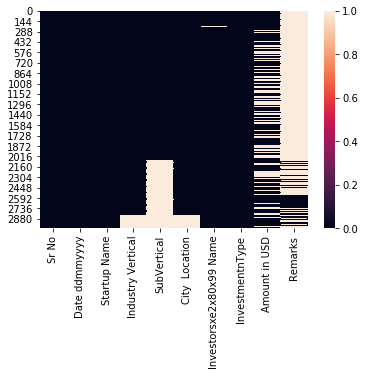

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.tail()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
3004,3053,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
3005,3054,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
3006,3055,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
3007,3056,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3008,3057,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [9]:
df.dtypes

Sr No                       int64
Date ddmmyyyy              object
Startup Name               object
Industry Vertical          object
SubVertical                object
City  Location             object
Investorsxe2x80x99 Name    object
InvestmentnType            object
Amount in USD              object
Remarks                    object
dtype: object

In [10]:
# df["Date ddmmyyyy"] = pd.to_datetime(df["Date ddmmyyyy"] , dayfirst=True , format="%d/%m/%y" )

In [11]:
# df["Date ddmmyyyy"]

In [12]:
df.dtypes

Sr No                       int64
Date ddmmyyyy              object
Startup Name               object
Industry Vertical          object
SubVertical                object
City  Location             object
Investorsxe2x80x99 Name    object
InvestmentnType            object
Amount in USD              object
Remarks                    object
dtype: object

In [13]:
import re

def modifiy_int(amt):
#     x = re.search("[\d]" , str(amt))
#     print(x)
#     if x is None:
#         return np.nan
#     else:
#         val = str(x.string)
        
#         x = re.sub("^[0-9|.]","" , val)
#         return float(x)
#     print(x)
    if amt is np.nan:
        return np.nan
    x = re.compile("[\d|.]")
    
    x=x.findall(amt)
    if len(x) >0 :
#         print(x)
        return ''.join(x)
    else:
        return np.nan

In [14]:
# modifiy_int("/-6,55.76")

In [14]:
Amount_in_USD =df["Amount in USD"].apply(modifiy_int )

In [15]:
df["Amount in USD"] = Amount_in_USD

In [16]:
df["Amount in USD"] = df["Amount in USD"].astype("float")

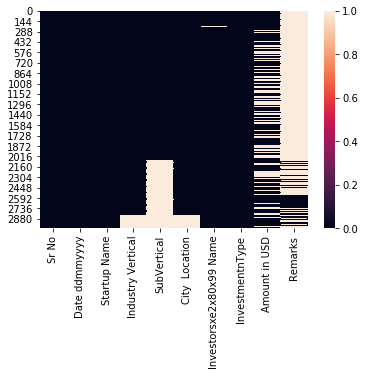

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,NaN


In [19]:
df["Amount in USD"].max()

3900000000.0

In [20]:
df.dtypes

Sr No                        int64
Date ddmmyyyy               object
Startup Name                object
Industry Vertical           object
SubVertical                 object
City  Location              object
Investorsxe2x80x99 Name     object
InvestmentnType             object
Amount in USD              float64
Remarks                     object
dtype: object

In [21]:
df["SubVertical"] = df["SubVertical"].fillna(df["SubVertical"].mode()[0])

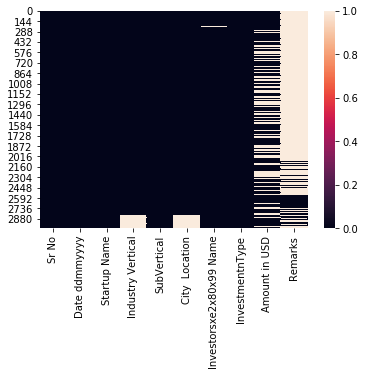

In [22]:
sns.heatmap(df.isna())

In [23]:
df["SubVertical"].mode()[0]

'Online Lending Platform'

In [24]:
 df["Industry Vertical"].fillna(df["Industry Vertical"].mode()[0] , inplace=True)

In [25]:
df["City  Location"].fillna(df["City  Location"].mode()[0] , inplace=True)

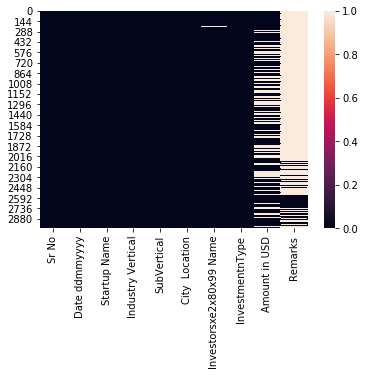

In [26]:
sns.heatmap(df.isna())

In [27]:
df.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,NaN


In [28]:
df["Investorsxe2x80x99 Name"].dropna(axis=0 , how="any",  inplace=True)

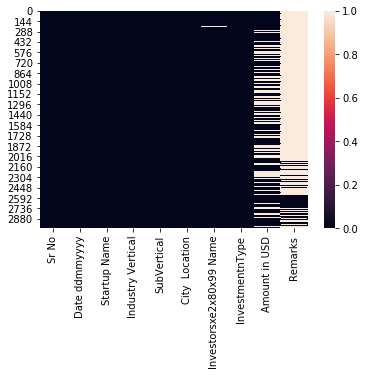

In [29]:
sns.heatmap(df.isna())

In [30]:
df["Investorsxe2x80x99 Name"].isna().sum()

0

In [31]:
df["InvestmentnType"].fillna(df["InvestmentnType"].mode()[0] , inplace=True)

In [32]:
df["Amount in USD"].fillna(df["Amount in USD"].mean() , inplace=True)

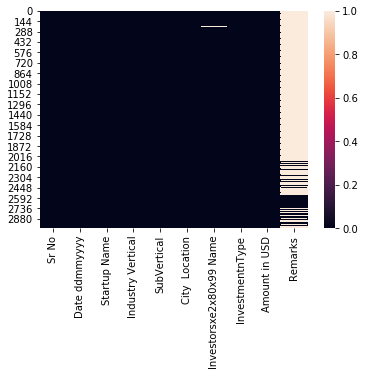

In [33]:
sns.heatmap(df.isna())

In [35]:
df["Startup Name"].unique()

array(['FPL Technologies', 'Cashflo', 'Digital F5', ..., 'Graphene',
       'Simplotel', 'couponmachine.in'], dtype=object)

In [36]:
df["Industry Vertical"].unique()

array(['FinTech', 'Advertising, Marketing', 'SaaS', 'IoT',
       'Information Technology', 'Consumer Technology',
       'Health and Wellness', 'Accounting', 'E-Commerce', 'Finance',
       'Retail', 'Customer Service Platform', 'Automotive',
       'Consumer Goods', 'Food and Beverage', 'EdTech', 'Services',
       'Transportation', 'Compliance', 'Transport',
       'Artificial Intelligence', 'Tech', 'Health Care', 'Luxury Label',
       'Waste Management Service', 'Deep-Tech', 'Agriculture', 'Energy',
       'Digital Media', 'E-commerce', 'Saas', 'Automobile', 'Agtech',
       'Social Media', 'Fintech', 'Edtech', 'Technology', 'AI',
       'Ecommerce', 'Nanotechnology', 'Hospitality', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace', 'B2B',
       'SaaS, Ecommerce', 'NBFC', 'Gaming', 'Food', 'Food Tech',
       'Automation', 'Education', 'Investment', 'Social Network',
       'Financial Tech', 'Software', 'Fashion', 'Logistics',
       'Real Estate

In [37]:
df["SubVertical"]

0                                      Financial Services
1       Invoice discounting platform and SME lending m...
2                                  Digital marketing firm
3                                    Education Technology
4                              Building automation system
5                                         Deep-technology
6                   Consumer Electronics, Home Appliances
7                                  Wearable Fitness Bands
8                        Mobile-based Accounting Software
9                                              Automotive
10                                Supply Chain Management
11                                          Fuel Delivery
12                                               VC Funds
13                Last-mile retail transaction technology
14                                        Social Commerce
15                                             Car Retail
16                                      Conversational AI
17            

In [38]:
df["City  Location"].unique()

array(['Pune', 'Mumbai', 'Hyderabad', 'Burnsville', 'Bengaluru',
       'Menlo Park', 'Gurgaon', 'New Delhi', 'Noida', 'Gurugram',
       'Palo Alto', 'San Francisco', 'Santa Monica', 'Singapore',
       'Kormangala', 'Taramani', 'Andheri', 'Chembur', 'Nairobi',
       'Haryana', 'New York', 'Karnataka', 'Mumbai/Bengaluru', 'Delhi',
       'Bhopal', 'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur',
       'India/US', 'Chennai', 'Nagpur', 'Indore', 'New York, Bengaluru',
       'California', 'India', 'Ahemadabad', 'Rourkela', 'Srinagar',
       'Bhubneswar', 'Chandigarh', 'Delhi & Cambridge', 'Kolkatta',
       'Kolkata', 'Coimbatore', 'Bangalore', 'Faridabad', 'Udaipur',
       'Ahemdabad', 'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa',
       'Uttar Pradesh', 'Nw Delhi', 'Gaya', 'Vadodara', 'Trivandrum',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Agra', 'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'Kozhikode', 'US',
       'Siliguri', 'USA', 'Lucknow', '

In [39]:
df["Investorsxe2x80x99 Name"].value_counts()

Undisclosed Investors                                                                                                                                      39
Undisclosed investors                                                                                                                                      30
Ratan Tata                                                                                                                                                 25
Indian Angel Network                                                                                                                                       23
Kalaari Capital                                                                                                                                            16
Sequoia Capital                                                                                                                                            15
Group of Angel Investors                            

In [34]:
df.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,NaN


In [35]:
df.rename(columns={"Date ddmmyyyy":"Date" ,
          "SubVertical":"Sub Vertical" , 
          "Investorsxe2x80x99 Name":"Investors Name"} , inplace=True)

In [36]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,NaN


In [37]:
Date = df["Date"]

In [38]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,NaN


In [39]:
for i in Date.unique():
    if len(i) >10 :
        print(i)
    elif i[-5] != "/":
        print(i)

05/072018
01/07/015
\\xc2\\xa010/7/2015
12/05.2015
13/04.2015
15/01.2015
22/01//2015


In [40]:
df["Date"][df["Date"] == "05/072018"] = "05/07/2018"
df["Date"][df["Date"] == "01/07/015"] = "01/07/2015"
df["Date"][df["Date"] == "\\xc2\\xa010/7/2015"] = "10/07/2015"
df["Date"][df["Date"] == "12/05.2015"] = "12/05/2015"
df["Date"][df["Date"] == "13/04.2015"] = "13/04/2015"
df["Date"][df["Date"] == "15/01.2015"] = "15/01/2015"
df["Date"][df["Date"] == "22/01//2015"] = "22/01/2015"

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda3/

In [41]:
df["Date"][df["Date"] == "\\\\xc2\\\\xa010/7/2015"] = "10/07/2015"


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
for i in Date.unique():
    if len(i) >10 :
        print(i)
    elif i[-5] != "/":
        print(i)

In [43]:
df["Date"] = pd.to_datetime(df["Date"] , dayfirst=True , )

In [44]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,0,2019-09-05,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN
1,1,2019-09-04,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,NaN
2,2,2019-09-04,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN
3,3,2019-09-04,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,NaN
4,4,2019-09-04,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 10 columns):
Sr No                3009 non-null int64
Date                 3009 non-null datetime64[ns]
Startup Name         3009 non-null object
Industry Vertical    3009 non-null object
Sub Vertical         3009 non-null object
City  Location       3009 non-null object
Investors Name       2986 non-null object
InvestmentnType      3009 non-null object
Amount in USD        3009 non-null float64
Remarks              419 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 235.2+ KB


-----------------------------------------------------------

Possible questions which could be answered are:

    How does the funding ecosystem change with time?
    Do cities play a major role in funding?
    Which industries are favored by investors for funding?
    Who are the important investors in the Indian Ecosystem?
    How much funds does startups generally get in India?


/root/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


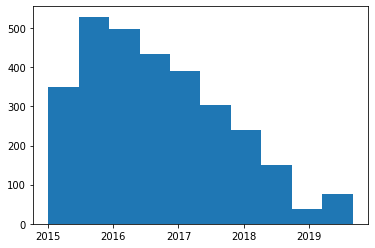

In [46]:
# Ecosystem change with time
plt.figure()
plt.hist(df.Date , bins=10)
plt.show()

In [47]:
year_counts = df.Date.dt.year.value_counts()

#     How does the funding ecosystem change with time?


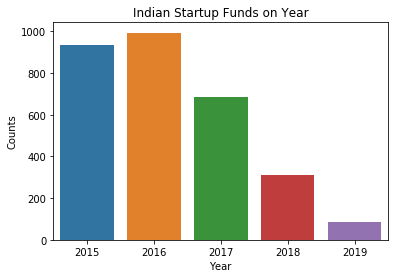

In [48]:

plt.figure()
plt.title("Indian Startup Funds on Year")
g = sns.barplot(year_counts.index , year_counts.values)
plt.xlabel("Year")
plt.ylabel("Counts")
plt.show()

# Do cities play a major role in funding?


In [49]:
cities_df= df["City  Location"].value_counts()

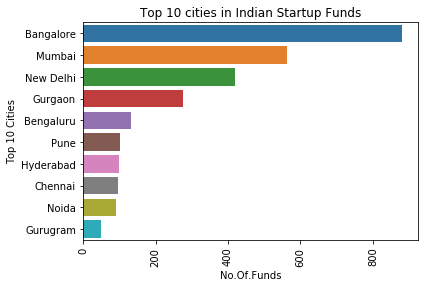

In [50]:
plt.figure()
plt.title("Top 10 cities in Indian Startup Funds")
g = sns.barplot(y=cities_df.index[:10] , x=cities_df.values[:10])
plt.xlabel("No.Of.Funds")
plt.xticks(rotation=90)
plt.ylabel("Top 10 Cities")
plt.show()

In [51]:
cities_df.index[:10]

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Bengaluru', 'Pune',
       'Hyderabad', 'Chennai', 'Noida', 'Gurugram'],
      dtype='object')

#     Which industries are favored by investors for funding?


In [54]:
df["Industry Vertical"].value_counts()

Consumer Internet                                     1112
Technology                                             476
E-Commerce                                             272
Healthcare                                              69
Finance                                                 61
Logistics                                               31
Food & Beverage                                         23
Education                                               22
Ed-Tech                                                 14
E-commerce                                              11
IT                                                       8
Ecommerce                                                8
Others                                                   6
FinTech                                                  6
Real Estate                                              6
Fin-Tech                                                 6
Online Education Platform                               

In [55]:
df["Industry Vertical"] [df["Industry Vertical"] == "eCommerce"] ="E-Commerce"
df["Industry Vertical"] [df["Industry Vertical"] == "ECommerce"] ="E-Commerce"


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
industries_df = df["Industry Vertical"].value_counts()

In [57]:
industries_df = industries_df.iloc[industries_df.values > 10]

In [58]:
industries_df

Consumer Internet    1112
Technology            476
E-Commerce            272
Healthcare             69
Finance                61
Logistics              31
Food & Beverage        23
Education              22
Ed-Tech                14
E-commerce             11
Name: Industry Vertical, dtype: int64

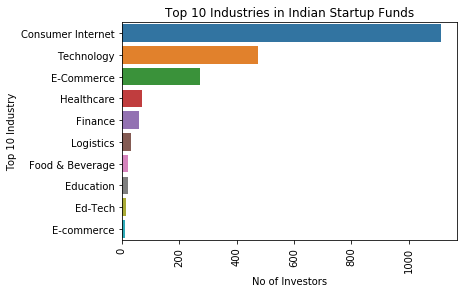

In [59]:
plt.figure()
plt.title("Top 10 Industries in Indian Startup Funds")
g = sns.barplot(y=industries_df.index[:10] , x=industries_df.values[:10])
plt.xlabel("No of Investors")
plt.xticks(rotation=90)
plt.ylabel("Top 10 Industry")
plt.show()

#     Who are the important investors in the Indian Ecosystem?


In [60]:
df["Investors Name"] [df["Investors Name"] =="Undisclosed investors"] = "Undisclosed Investors"
df["Investors Name"] [df["Investors Name"] =="Undisclosed Investor"] = "Undisclosed Investors"
df["Investors Name"] [df["Investors Name"] =="undisclosed investors"] = "Undisclosed Investors"
df["Investors Name"] [df["Investors Name"] =="Undisclosed"] = "Undisclosed Investors"


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda3/

In [61]:
investors_df = df["Investors Name"].value_counts()

In [62]:
investors_df.head()


Undisclosed Investors       103
Ratan Tata                   25
Indian Angel Network         23
Kalaari Capital              16
Group of Angel Investors     15
Name: Investors Name, dtype: int64

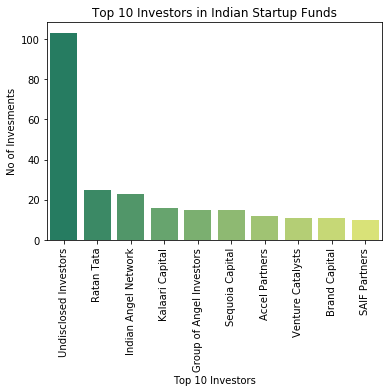

In [63]:
plt.figure()
plt.title("Top 10 Investors in Indian Startup Funds")
g = sns.barplot(x=investors_df.index[:10] , y=investors_df.values[:10] , palette="summer")
plt.ylabel("No of Invesments")
plt.xticks(rotation=90)
plt.xlabel("Top 10 Investors")
plt.show()

#     How much funds does startups generally get in India?


In [64]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,0,2019-09-05,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,NaN
1,1,2019-09-04,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,NaN
2,2,2019-09-04,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,NaN
3,3,2019-09-04,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,NaN
4,4,2019-09-04,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,NaN


In [65]:
startup_funds = df.groupby("Industry Vertical")["Amount in USD"]

In [66]:
st_fud = startup_funds.mean()

In [67]:
st_fud = pd.DataFrame({
    "Industry Vertical":st_fud.index , 
    "mean"  :st_fud.values
})

In [68]:
st_fud.sort_values(by="mean" , ascending=False)

,Industry Vertical,mean
761,\\xc2\\xa0News Aggregator mobile app,2.020000e+09
766,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,2.019350e+09
763,\\xc2\\xa0Online Jewellery Store,2.016200e+09
758,\\xc2\\xa0Casual Dining restaurant Chain,2.010000e+09
718,Transportation,1.302861e+09
165,E-Commerce & M-Commerce platform,6.800000e+08
180,Ecommerce Marketplace,5.000000e+08
82,Car Aggregator & Retail Mobile App,5.000000e+08
76,Cab Aggregator,4.000000e+08
523,Online Marketplace,3.500715e+08


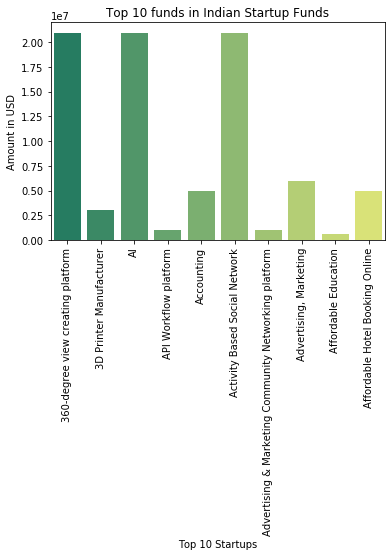

In [69]:
plt.figure()
plt.title("Top 10 funds in Indian Startup Funds")
g = sns.barplot(x=st_fud["Industry Vertical"][:10] , y=st_fud["mean"][:10] , palette="summer")
plt.ylabel("Amount in USD")
plt.xticks(rotation=90)
plt.xlabel("Top 10 Startups")
plt.show()

In [70]:
startup_funds_yearly = df.groupby(df["Date"].dt.year)["Amount in USD"]

Text(0, 0.5, 'Amount in USD in [E]')

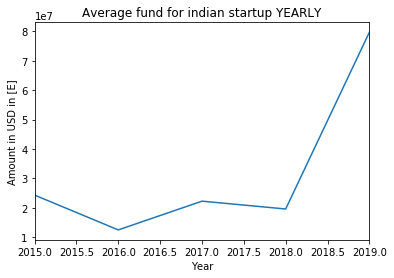

In [71]:
plt.figure()
plt.title("Average fund for indian startup YEARLY")
startup_funds_yearly.mean().plot()
plt.xlabel("Year")
plt.ylabel("Amount in USD in [E]")

In [72]:
startup_funds_yearly.mean()

Date
2015    2.429212e+07
2016    1.244227e+07
2017    2.222563e+07
2018    1.956505e+07
2019    7.969910e+07
Name: Amount in USD, dtype: float64